In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


pd.set_option('display.max_columns', None) 
warnings.filterwarnings('ignore')

In [2]:
#import the csv-file

data = pd.read_csv('train_boston-3.csv') 
data.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [3]:

#Remove the space in the column names

data.columns = [column.lower().replace(' ', '') for column in data.columns]

In [4]:
data.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [5]:
data.shape

(17276, 22)

In [6]:
data.describe()

,index,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
count,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,1.727600e+04
mean,10773.917921,4.581570e+09,3.380528,2.118011,2084.123177,1.508619e+04,1.497685,0.007641,0.233619,3.406518,7.660627,1791.053542,293.069634,1971.201783,83.881223,98078.075075,47.559617,-122.214537,1988.115825,12648.988307,5.408807e+05
std,6241.518773,2.882571e+09,0.933642,0.768608,924.621058,4.147208e+04,0.541526,0.087079,0.768524,0.648544,1.178615,830.925292,445.900684,29.340613,400.517491,53.581267,0.138633,0.140474,687.864331,25805.732442,3.732611e+05
min,0.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,8.000000e+04
25%,5380.750000,2.115720e+09,3.000000,1.750000,1420.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.468275,-122.329000,1490.000000,5100.000000,3.210202e+05
50%,10770.500000,3.904961e+09,3.000000,2.250000,1920.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7614.000000,4.500000e+05
75%,16179.500000,7.304301e+09,4.000000,2.500000,2556.250000,1.069850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677400,-122.125000,2360.000000,10093.250000,6.442125e+05
max,21595.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000,7.700000e+06


In [7]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.705890
grade            0.668464
sqft_above       0.607706
sqft_living15    0.585543
bathrooms        0.525935
view             0.396544
sqft_basement    0.331291
bedrooms         0.310081
lat              0.302609
waterfront       0.267050
floors           0.252224
yr_renovated     0.128425
sqft_lot         0.092304
sqft_lot15       0.089045
yr_built         0.053602
condition        0.034459
index            0.023370
lon              0.020460
id              -0.010658
zip_code        -0.051657
Name: price, dtype: float64

In [8]:
#grade does not have a high correlation to condition but very high correlation to most of the other columsn
#can be in excellent condition but got a lower grade (grade 3 and condition 5 -luxury)

data.corr()['grade'].sort_values(ascending=False)

grade            1.000000
sqft_living      0.763637
sqft_above       0.756004
sqft_living15    0.716644
price            0.668464
bathrooms        0.666254
floors           0.454156
yr_built         0.445482
bedrooms         0.356455
view             0.257785
lon              0.198030
sqft_basement    0.174684
sqft_lot15       0.131490
sqft_lot         0.118996
lat              0.111117
waterfront       0.082233
index            0.077612
yr_renovated     0.014433
id               0.012668
condition       -0.145523
zip_code        -0.182422
Name: grade, dtype: float64

In [9]:
#condition is not high correlated to the other columns - conclusion: grade is much more meaningful than condition

data.corr()['condition'].sort_values(ascending=False)

condition        1.000000
sqft_basement    0.179284
view             0.040916
price            0.034459
bedrooms         0.030263
waterfront       0.005473
zip_code         0.003148
sqft_lot15      -0.003773
sqft_lot        -0.009524
lat             -0.013502
id              -0.026975
sqft_living     -0.055229
yr_renovated    -0.055699
sqft_living15   -0.088957
index           -0.094405
lon             -0.109416
bathrooms       -0.127600
grade           -0.145523
sqft_above      -0.157666
floors          -0.265902
yr_built        -0.362749
Name: condition, dtype: float64

In [10]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
index,0.0
id,0.0
sqft_lot15,0.0
sqft_living15,0.0
lon,0.0
lat,0.0
zip_code,0.0
yr_renovated,0.0
yr_built,0.0
sqft_basement,0.0


In [11]:
data.isna().sum()

index            0
id               0
data             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zip_code         0
lat              0
lon              0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [12]:
data.dtypes

index              int64
id                 int64
data              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zip_code           int64
lat              float64
lon              float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [13]:
#Drop the following columns: sqft_above and sqft_basement - reason: 100% correlation with sqft_living
#(=sum of these two columns)
#also dropping: lon and lat: similar to zip_code - input von lon and lat lead to more errors (two inputs instead of one)
#also ID: dummifying generates too many columns - makes no sense.

data=data.drop(['id','index','lon','lat','sqft_above','sqft_basement'],axis=1)


In [14]:
data1=data.copy()

data1.head()

,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price
0,9/23/14,2,1.50,1620,1444,2.0,0,0,3,9,2007,0,98144,1660,1642,525000
1,6/20/14,3,2.75,2470,10125,2.0,0,0,3,8,1960,2012,98040,2290,10125,970500
2,4/25/15,2,1.00,1140,7435,1.0,0,0,3,7,1952,1990,98125,1320,9385,327000
3,5/6/15,3,1.00,1460,6198,1.5,0,0,4,7,1916,0,98107,2280,5160,775000
4,9/24/14,2,1.00,670,6720,1.0,0,0,5,6,1942,0,98126,710,6720,304950


In [15]:
data1.dtypes

data              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
yr_built           int64
yr_renovated       int64
zip_code           int64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [16]:
data1.shape

(17276, 16)

In [17]:
data1 = data.rename(columns={'data':'selling_date'})

In [18]:
data1['selling_date'] = pd.to_datetime(data1['selling_date'], errors='coerce')

#The following two columns can not be converted into datetime because it is only the year
#data1['yr_built'] = pd.to_datetime(data1['yr_built'])
#data1['yr_renovated'] = pd.to_datetime(data1['yr_renovated'])


In [19]:
data1.dtypes

selling_date     datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
yr_built                  int64
yr_renovated              int64
zip_code                  int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [20]:

#Can not be used because the information in the cell contains just 4 units (only year, no days or months)
#data1['yr_built']=data1['yr_built'].dt.year
#data1['yr_renovated']=data1['yr_renovated'].dt.year


In [21]:
data1['yr_renovated']=data1['yr_renovated'].apply(lambda x:1 if x>0 else 0)

In [22]:
data1['zip_code']=data1['zip_code'].astype(object)
data1['yr_renovated']=data1['yr_renovated'].astype(object)
data1['waterfront']=data1['waterfront'].astype(object)


data1

,selling_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price
0,2014-09-23,2,1.50,1620,1444,2.0,0,0,3,9,2007,0,98144,1660,1642,525000
1,2014-06-20,3,2.75,2470,10125,2.0,0,0,3,8,1960,1,98040,2290,10125,970500
2,2015-04-25,2,1.00,1140,7435,1.0,0,0,3,7,1952,1,98125,1320,9385,327000
3,2015-05-06,3,1.00,1460,6198,1.5,0,0,4,7,1916,0,98107,2280,5160,775000
4,2014-09-24,2,1.00,670,6720,1.0,0,0,5,6,1942,0,98126,710,6720,304950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,2014-12-03,2,1.75,1810,7523,1.0,0,0,3,8,1962,1,98027,2090,7523,501000
17272,2015-04-16,3,2.25,1190,1200,3.0,0,0,3,8,2008,0,98103,1180,1224,475000
17273,2014-05-05,6,1.75,2920,5000,2.5,0,0,4,9,1908,0,98122,2020,5000,823000
17274,2015-05-08,3,1.00,910,5212,1.0,0,0,3,7,1951,0,98115,1520,6300,565000


In [23]:
data1.dtypes


selling_date     datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                 int64
grade                     int64
yr_built                  int64
yr_renovated             object
zip_code                 object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [24]:
data1.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15,price
count,17276.000000,17276.000000,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,1.727600e+04
mean,3.380528,2.118011,2084.123177,1.508619e+04,1.497685,0.233619,3.406518,7.660627,1971.201783,1988.115825,12648.988307,5.408807e+05
std,0.933642,0.768608,924.621058,4.147208e+04,0.541526,0.768524,0.648544,1.178615,29.340613,687.864331,25805.732442,3.732611e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,460.000000,651.000000,8.000000e+04
25%,3.000000,1.750000,1420.000000,5.030000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000,1490.000000,5100.000000,3.210202e+05
50%,3.000000,2.250000,1920.000000,7.599000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,1840.000000,7614.000000,4.500000e+05
75%,4.000000,2.500000,2556.250000,1.069850e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,2360.000000,10093.250000,6.442125e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,6210.000000,560617.000000,7.700000e+06


In [25]:
#import numpy as np

#for col in data1.select_dtypes(np.number):
 #   sns.displot(data1[col])
 #   plt.show()



In [26]:
#Remove outliers:

# removing outliers
# first we find our interquartile range
iqr = np.percentile(data1['bedrooms'],75) - np.percentile(data1['bedrooms'],25)
iqr


1.0

In [27]:
# if you don't have your own conception of outlier for the data you are analyzing, 
# the standard threshold to consider is by adding (upper) or subtracting (lower) 1.5 x IQR
upper_limit_bed = np.percentile(data['bedrooms'],75) + 5*iqr
lower_limit_bed = np.percentile(data['bedrooms'],25) - 2.0*iqr
upper_limit_bed, lower_limit_bed

(9.0, 1.0)

In [28]:
upper_limit = np.percentile(data['sqft_living'],75) + 5000*iqr
lower_limit = np.percentile(data['sqft_living'],25) - 1000.0*iqr
upper_limit, lower_limit

(7556.25, 420.0)

In [29]:
upper_limit_bath = np.percentile(data['bathrooms'],75) + 1.5*iqr
lower_limit_bath = np.percentile(data['bathrooms'],25) - 1*iqr
upper_limit_bath, lower_limit_bath

(4.0, 0.75)

In [30]:
upper_limit_lot = np.percentile(data['sqft_lot'],75) + 1170000*iqr
lower_limit_lot = np.percentile(data['sqft_lot'],25) - 5000*iqr
upper_limit_lot, lower_limit_lot

(1180698.5, 30.0)

In [31]:
data1 = data1[(data1['bedrooms']>=lower_limit_bed) & (data1['bedrooms']<=upper_limit_bed)]
data1 = data1[(data1['bathrooms']>=lower_limit_bath) & (data1['bathrooms']<=upper_limit_bath)]
data1 = data1[(data1['sqft_living']>=lower_limit) & (data1['sqft_living']<=upper_limit)]
data1 = data1[(data1['sqft_lot']>=lower_limit_lot) & (data1['sqft_lot']<=upper_limit_lot)]


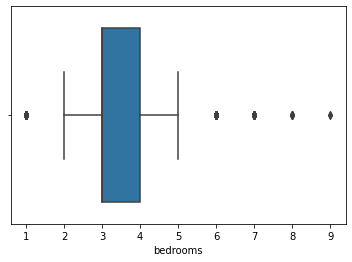

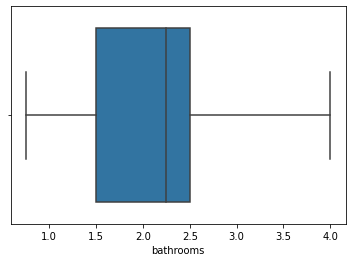

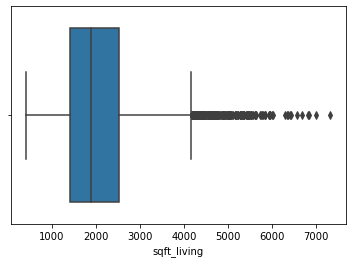

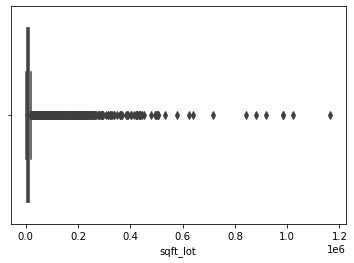

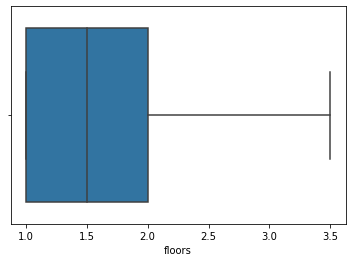

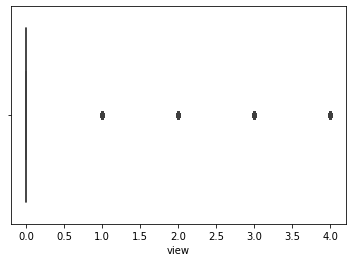

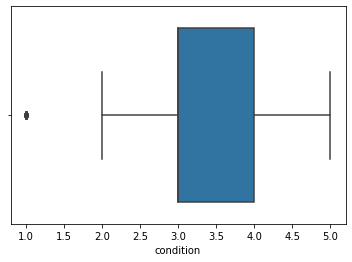

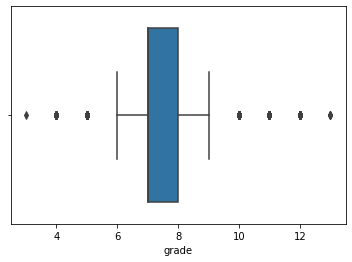

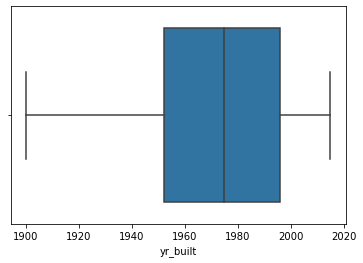

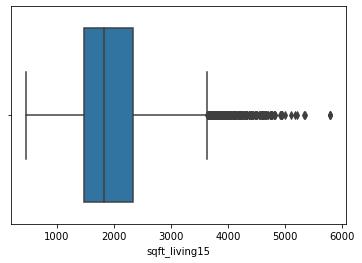

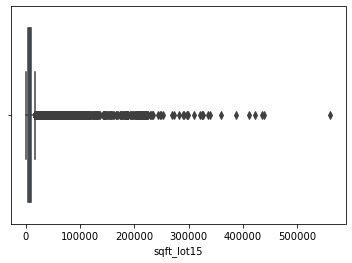

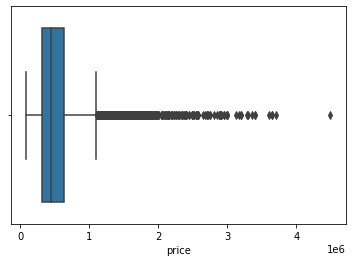

In [32]:
#let's check for outliers
for col in data1.select_dtypes(np.number):
    sns.boxplot(x=data1[col])
    plt.show()

In [33]:
#Using sthe StandardScaler for transformation the numerical data


#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#X = data1.drop('price', axis=1)
#y = data1['price']


In [34]:
#X = pd.get_dummies(X)

In [35]:
#separate categorical and numerical columns

data_num = data1.select_dtypes(np.number)
data_cat = data1.select_dtypes(np.object)

data_cat

,waterfront,yr_renovated,zip_code
0,0,0,98144
1,0,1,98040
2,0,1,98125
3,0,0,98107
4,0,0,98126
...,...,...,...
17271,0,1,98027
17272,0,0,98103
17273,0,0,98122
17274,0,0,98115


In [36]:
#drop the target column from the numerical columns

X = data_num.drop('price', axis=1)
y = data_num['price']
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,sqft_living15,sqft_lot15
0,2,1.50,1620,1444,2.0,0,3,9,2007,1660,1642
1,3,2.75,2470,10125,2.0,0,3,8,1960,2290,10125
2,2,1.00,1140,7435,1.0,0,3,7,1952,1320,9385
3,3,1.00,1460,6198,1.5,0,4,7,1916,2280,5160
4,2,1.00,670,6720,1.0,0,5,6,1942,710,6720
...,...,...,...,...,...,...,...,...,...,...,...
17271,2,1.75,1810,7523,1.0,0,3,8,1962,2090,7523
17272,3,2.25,1190,1200,3.0,0,3,8,2008,1180,1224
17273,6,1.75,2920,5000,2.5,0,4,9,1908,2020,5000
17274,3,1.00,910,5212,1.0,0,3,7,1951,1520,6300


In [37]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
#1st Step Transform the numerical columns

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X)

x_standardized = transformer.transform(X)







In [39]:
#transform the categorical columns in numerical


data_cat = pd.get_dummies(data_cat)

In [56]:
x_standardized[0]

array([-1.54341547, -0.82325109, -0.50231324, -0.33960642,  0.94129041,
       -0.29643405, -0.62878567,  1.20616117,  1.22845912, -0.46821428,
       -0.42840324])

In [41]:
#concatenate the categorical and the numerical columns


data_for_model = np.concatenate((x_standardized, data_cat), axis=1)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(data_for_model, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions  = model.predict(X_test)

In [43]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.8126240029013048, 140986.31593983114, 19877141282.28588)

In [44]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [46]:
from sklearn import metrics

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9737791104004274
Adjusted R^2: 0.973590948676834
MAE: 30716.36098825522
MSE: 2734574335.6390433
RMSE: 52293.15763691311


In [47]:
reg.feature_importances_


array([5.84707941e-03, 1.41803474e-02, 1.76963353e-01, 2.53422028e-02,
       4.90987086e-03, 1.76981751e-02, 6.55005445e-03, 3.96307039e-01,
       9.79529315e-02, 4.69153905e-02, 3.17793533e-02, 1.43257362e-02,
       1.72474067e-02, 1.19409359e-03, 1.22013926e-03, 1.89815815e-03,
       4.14247360e-04, 1.76160340e-03, 3.43047504e-02, 1.89547367e-03,
       3.71831149e-03, 9.29433579e-04, 2.25945052e-03, 2.08631413e-04,
       4.57078521e-04, 1.11826183e-04, 2.56152387e-04, 9.11484159e-04,
       5.58046394e-03, 7.01025420e-05, 6.93096191e-04, 4.11257907e-04,
       6.13491052e-04, 1.42980662e-03, 1.33496385e-03, 7.02814020e-04,
       9.67811087e-03, 2.56569011e-03, 2.34091586e-03, 7.00987594e-03,
       9.26916198e-03, 3.29174201e-03, 2.42783368e-04, 3.03840910e-03,
       1.70488759e-03, 1.16347495e-03, 5.74481395e-04, 2.31214209e-03,
       7.56467393e-04, 6.11949877e-04, 1.57635790e-04, 6.64712281e-04,
       1.42742512e-03, 1.01603054e-03, 2.11185704e-04, 3.42924464e-03,
      

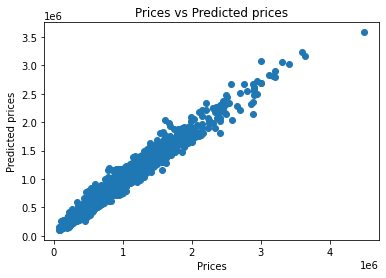

In [48]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)

In [50]:
print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))

0.7144981286694336
0.6667830019668265


In [51]:
data1

,selling_date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price
0,2014-09-23,2,1.50,1620,1444,2.0,0,0,3,9,2007,0,98144,1660,1642,525000
1,2014-06-20,3,2.75,2470,10125,2.0,0,0,3,8,1960,1,98040,2290,10125,970500
2,2015-04-25,2,1.00,1140,7435,1.0,0,0,3,7,1952,1,98125,1320,9385,327000
3,2015-05-06,3,1.00,1460,6198,1.5,0,0,4,7,1916,0,98107,2280,5160,775000
4,2014-09-24,2,1.00,670,6720,1.0,0,0,5,6,1942,0,98126,710,6720,304950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,2014-12-03,2,1.75,1810,7523,1.0,0,0,3,8,1962,1,98027,2090,7523,501000
17272,2015-04-16,3,2.25,1190,1200,3.0,0,0,3,8,2008,0,98103,1180,1224,475000
17273,2014-05-05,6,1.75,2920,5000,2.5,0,0,4,9,1908,0,98122,2020,5000,823000
17274,2015-05-08,3,1.00,910,5212,1.0,0,0,3,7,1951,0,98115,1520,6300,565000


In [57]:
X_train.shape

(11931, 85)

In [58]:
X.shape

(17045, 11)

In [59]:
data_cat.shape

(17045, 74)